# Figures and analysis

This is the Jupyter notebook (Python3 kernel) containing scripts about producing the main figures and analytical results of the manuscript "Fitness inference from deep mutational scanning data". In this notebook, we organize all the inference results of the paper and pass them to multiple functions in figure.py (available at './src' folder of this Github repository) to generate all the visualizations. All the necessary packages version could be found in package section in the notebook and figure.py, or more convenient way is to run the setup.py in the repository. All the figures would be collected as PDF format in the './figures' folder of the repository.

# Contents
* [Libraries and variables](#package)
* [Figures and data analysis](#figure)
    * [Figure 1. Wright-Fisher simulation and mutational effects inference](#simulation)
    * [Figure 2. MPL is more consistent across replicates than current methods](#performance)
    * [Figure 3. Visualizations of MPL_DMS](#visualization)

## Libraries and variables<a class = "anchor" id = "package"></a>

In [1]:
# Full library list and version numbers

print('The necessary packages and corresponding version:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches


print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import logomaker as lm
import cv2

from matplotlib.lines import Line2D
import warnings

import figures

warnings.filterwarnings("ignore")

# Plot variables
TEXT_FONTSIZE = 6
SERIAL_FONTSIZE = 8
TEXT_FONT = 'Arial'
FIG_DPI = 400
CM = 1/2.54

SERIAL_FONT = {
    'family': TEXT_FONT,
    'size': SERIAL_FONTSIZE,
    'weight': 'bold'
}

FONT = {
    'family': TEXT_FONT,
    'weight': 'normal',
    'size': TEXT_FONTSIZE
}

REGION_FONT = {
    'family': TEXT_FONT,
    'weight': 'bold',
    'size': TEXT_FONTSIZE
}

matplotlib.rc('font', **FONT)

# File path
TRAJECTORY_PATH = './outputs/simulation/WF_finite_sampling/'
WF_INFERENCE_PATH = './outputs/simulation/WF_mutational_effects'
FIG_FILE = './figures/'


The necessary packages and corresponding version:
python == 3.7.6 (default, Dec 27 2019, 09:51:07) 
[Clang 11.0.0 (clang-1100.0.33.16)]
numpy == 1.21.6
scipy == 1.7.3
pandas == 1.3.5
matplotlib == 3.5.1
seaborn == 0.9.0


## Figures and data analysis<a class = "anchor" id = "figure"></a>

### Figure 1. Wright-Fisher simulation and mutational effects inference<a class = "anchor" id = "simulation"></a>

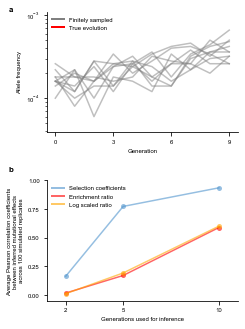

In [2]:
figures.FIG1_SIMULATION_FINITE_SAMPLING()
plt.show()

### Figure 2. MPL is more consistent across replicates than current methods<a class = "anchor" id = "performance"></a>

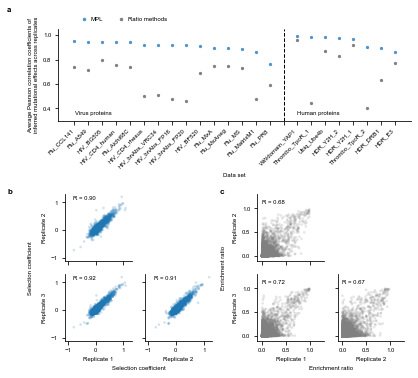

In [3]:
figures.FIG2_METHODS_COMPARISON()
plt.show()

### Figure 3. Visualizations of MPL_DMS<a class = "anchor" id = "visualization"></a>

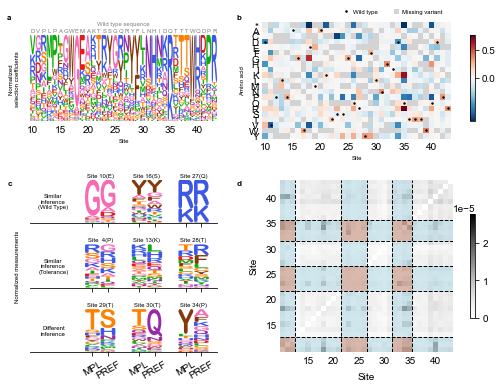

<Figure size 432x288 with 0 Axes>

In [4]:
figures.FIG3_VISUALIZATION()
plt.show()

### Figure4. Visualizations of Epistasis<a class = "anchor" id = "visualization"></a>

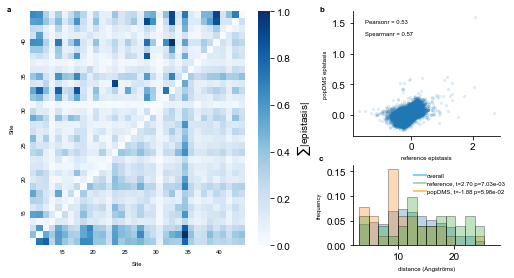

In [2]:
figures.FIG4_VISUALIZATION()

### Supplemental figure 1. Epistasis scatter<a class = "anchor" id = "epistasis supp"></a>

                         selection_coefficient_x  selection_coefficient_y
selection_coefficient_x                 1.000000                 0.999314
selection_coefficient_y                 0.999314                 1.000000 (34859, 6)


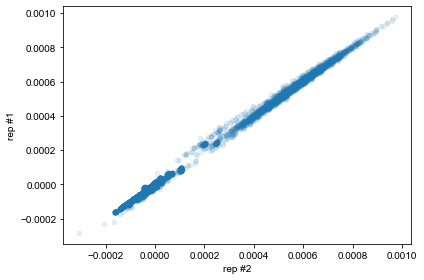

In [6]:
figures.SUPPFIG1_EPISTASIS()